In [1]:
from Model import Model
import math
import Parameters
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import Dependency as Dependency
import Util
from ModelData import ModelData
import Parameters

# Setting up hyperparameters

In [2]:
forecast_days = 365
infectiousness = 0.06
save = False
m = Model(forecast_days=forecast_days, infectiousness=infectiousness, prior_immunity=0)

# Visualization dependencies

In [3]:
def moving_average_compare(data):
    return Util.moving_average(data[0,:,:])

## Display the raw data before forecast

C:\Users\loveb\AppData\Local\Temp\ipykernel_50976\1400647390.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1))


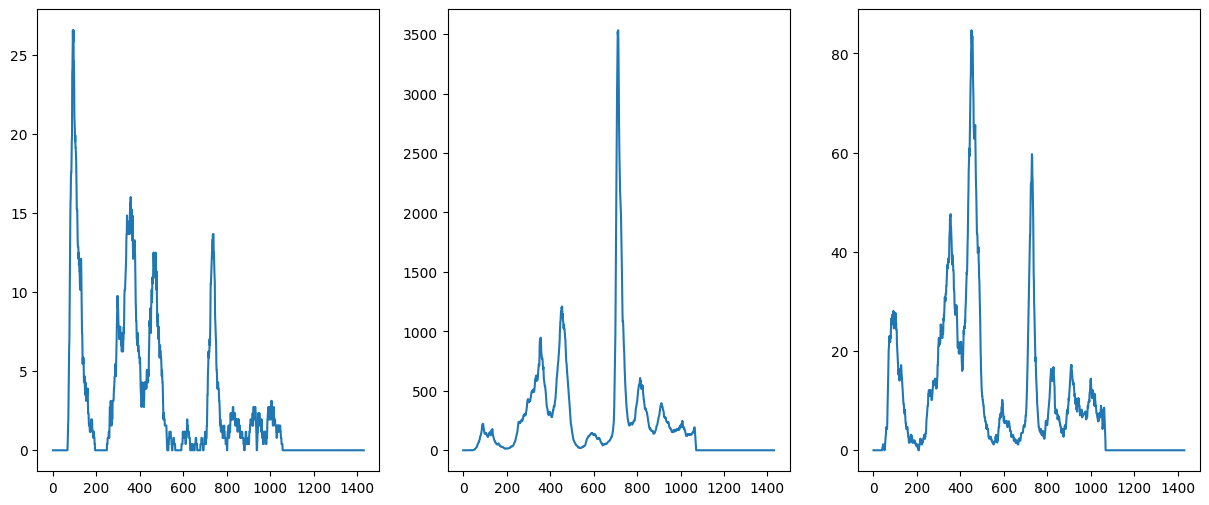

In [4]:
data = m._model_data

deaths = moving_average_compare(data.time_series_deaths)
cases = moving_average_compare(data.time_series_clinical_cases)
hospitalized = moving_average_compare(data.time_series_hospitalized)

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1))
plt.subplot(1,3,2), plt.plot(range(0, cases.shape[0]), np.sum(cases, axis=1))
plt.subplot(1,3,3), plt.plot(range(0, hospitalized.shape[0]), np.sum(hospitalized, axis=1))
plt.show()

# Run the model

In [5]:
for _ in range(forecast_days):
    m.run_one_cycle(display_status=True)
    pass

925
Today_new_cases 3618.5460313353115
Total new cases 3605775.853529086
926
Today_new_cases 3501.980027092426
Total new cases 3609277.8335561785
927
Today_new_cases 3469.5029873994276
Total new cases 3612747.3365435787
928
Today_new_cases 3315.5971623219275
Total new cases 3616062.933705903
929
Today_new_cases 3161.0007949945866
Total new cases 3619223.9345008945
930
Today_new_cases 3045.6412506841552
Total new cases 3622269.5757515766
931
Today_new_cases 2952.833982107424
Total new cases 3625222.409733686
932
Today_new_cases 2919.4032718343824
Total new cases 3628141.813005523
933
Today_new_cases 2886.4454732405543
Total new cases 3631028.258478763
934
Today_new_cases 2852.926306972819
Total new cases 3633881.1847857344
935
Today_new_cases 2818.9975099591625
Total new cases 3636700.1822956936
936
Today_new_cases 2785.37303381647
Total new cases 3639485.5553295068
937
Today_new_cases 2753.8833969459583
Total new cases 3642239.438726457
938
Today_new_cases 2722.033080088081
Total new c

## Display post-forecast data

C:\Users\loveb\AppData\Local\Temp\ipykernel_12328\3856494676.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1)), plt.title('Number of deaths')


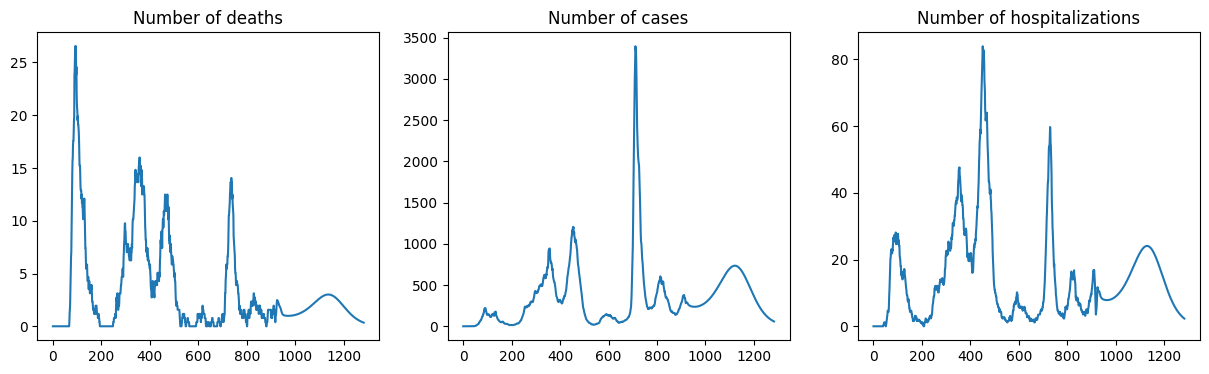

In [6]:
deaths = moving_average_compare(data.time_series_deaths)
cases = moving_average_compare(data.time_series_clinical_cases)
hospitalized = moving_average_compare(data.time_series_hospitalized)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1)), plt.title('Number of deaths')
plt.subplot(1,3,2), plt.plot(range(0, cases.shape[0]), np.sum(cases, axis=1)), plt.title('Number of cases')
plt.subplot(1,3,3), plt.plot(range(0, hospitalized.shape[0]), np.sum(hospitalized, axis=1)), plt.title('Number of hospitalizations')
plt.show()

C:\Users\loveb\AppData\Local\Temp\ipykernel_12328\2726694870.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, vaccinated.shape[0]), np.sum(vaccinated, axis=1)), plt.title('Percentage of vaccinated individuals')


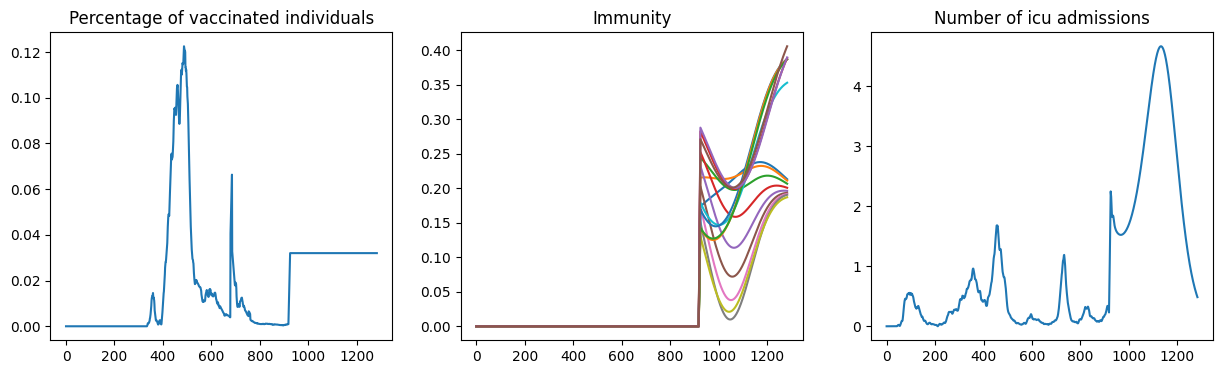

In [7]:
vaccinated = moving_average_compare(data.time_series_vaccinated)
immunity = moving_average_compare(data.time_series_immunity)
icu = moving_average_compare(data.time_series_ICU)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, vaccinated.shape[0]), np.sum(vaccinated, axis=1)), plt.title('Percentage of vaccinated individuals')
plt.subplot(1,3,2), plt.plot(range(0, immunity.shape[0]), immunity), plt.title('Immunity')
plt.subplot(1,3,3), plt.plot(range(0, icu.shape[0]), np.sum(icu, axis=1)), plt.title('Number of icu admissions')
plt.show()

## Save the data to local files.

In [8]:
# save = True
if save:
    m.save_to_file()
print('Done!')

Done!
